## <p style = "text-align: center" >WEB SCRAPPING</p>
<hr>

### What is Web Scrapping? 


- Web scraping is the process of automatically <span style = "color:red">extracting</span> data from websites. 

- It involves retrieving the HTML or XML source code of a web page and then parsing and extracting relevant information from that code. Web scraping allows you to gather data from multiple web pages and websites, which can be useful for various purposes such as data analysis, research, or building applications.

We have a couple of python libraries which are perfect for this kind of task, some of the examples include:

1). **BeautifulSoup** - provides an easy and convenient way to extract data from HTML and XML documents

2). **MechanicalSoup** - a library is built on top of BeatifulSoup that makes it easier to perform web scraping tasks that involve form submission and session manangement.

3). **Selenium** - ideal for dynamic web pages

For my notebook, I am going to use BeautifulSoup, and thus we need a few packages pre-installed:

For pip:
- pip install bs4 
- pip install requests        

For Conda:
- conda install bs4
- conda install requests
          


In [9]:
import requests
from bs4 import BeautifulSoup

In [ ]:
#We use the 'get' function from the 'requests' module
#We are accessing the google homepage
result = requests.get("https://www.google.com/")

#200 will show us that the content that your'e looking for is present and that the response is okay
#The page is accessible as illustrated by our output code result
print(result.status_code)

200


In [11]:
print(result.headers) #These are some of the HTTP headers of a response made from making a web request, essential for web development and API interactions
print(result.content) #Will print the source code of our page

#Storing the page content of the website accessed into a variable
src = result.content

{'Date': 'Tue, 27 Jun 2023 16:14:07 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-JGPcpVglgSGxOvo9wj-ltQ' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-06-27-16; expires=Thu, 27-Jul-2023 16:14:07 GMT; path=/; domain=.google.com; Secure, AEC=AUEFqZcfPeRMQa9cpEMBqzfgl4_gsAbYLEnKZKVNLn_W_YljtGeCqUqLbw; expires=Sun, 24-Dec-2023 16:14:07 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=Vr0oCG9e927_25lWjJaIouv8s9ZbfIGVMEg6NyR3mZxoFz2Elfl2OwR2LRbiMA-gHq3-gDoIar8r4--TEK_fuBXQJEWoCyY5ScD6_xgIop4ZIrZViy6nAvDhWWXK1szXOWpJEU1mfb9fVH3Eh

This brings us to our next question:
## What is Parsing?
Think of parsing like reading and interpreting a book. When you read a book, you look at the words, sentences, and paragraphs to understand the meaning and extract relevant information. Similarly, when BeautifulSoup parses HTML or XML code, it reads the code and organizes it in a way that allows you to easily find and work with specific parts of the code, such as tags or text content.

In [12]:
#initializing a beautifulsoup object, here as 'soup'
#additional optional parameter 'parser'
soup = BeautifulSoup(src)

Once the BeautifulSoup object is created, you can use its methods and properties to navigate and extract data from the parsed document.


## soup.find_all() and soup.body.findAll()

They are used to find occurences of a particular HTML or XML element i.e. tags for example.

The difference between the two are:
- <span style = "color:red">soup.find_all()</span> searches the entire document, including the `<head>`, `<body>`, and any other elements outside the `<body>`. It is useful when you want to find elements throughout the entire document.

- <span style = "color:red">soup.body.findAll()</span> focuses only on the elements within the `<body>` element. It is handy when you specifically want to extract elements from the main content area of the web page.

In [13]:
#Looking for all links aka <a> tags on the page
links = soup.find_all('a')
links

[<a class="gb1" href="https://www.google.com/imghp?hl=sw&amp;tab=wi">Picha</a>,
 <a class="gb1" href="https://maps.google.co.ke/maps?hl=sw&amp;tab=wl">Ramani</a>,
 <a class="gb1" href="https://play.google.com/?hl=sw&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">Habari</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">Hifadhi</a>,
 <a class="gb1" href="https://www.google.co.ke/intl/en/about/products?tab=wh" style="text-decoration:none"><u>Mengineyo</u> »</a>,
 <a class="gb4" href="http://www.google.co.ke/history/optout?hl=sw">Historia kwenye Wavuti</a>,
 <a class="gb4" href="/preferences?hl=sw">Mipangilio</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=sw&amp;passive=true&amp;continue=https://www.google.com/&amp;ec=GAZAAQ" id="gb_70" target="_top">Ingia</a>,
 <a href="/advanced_search?h

We want to look for a particular text within the links.

So we need to print all the text within the link tags:

In [14]:
for link in links:
    print(link.text)

Picha
Ramani
Play
YouTube
Habari
Gmail
Hifadhi
Mengineyo »
Historia kwenye Wavuti
Mipangilio
Ingia
Utafutaji wa kina
English
Matangazo 
Kila Kitu Kuhusu Google
Google.com in English


I want to look for the text "about" or in my case in Swahili "Kila Kitu Kuhusu Google": 

In [15]:
for link in links:
    if "Kila Kitu Kuhusu Google" in link.text:
        print(link)
        print(link.attrs['href']) #Give us the content of the href inside the link tag

<a href="/intl/sw/about.html">Kila Kitu Kuhusu Google</a>
/intl/sw/about.html


##### <span style = "color: red">IMPORTANT!</span> Respect the website's guidelines and terms of service to help you maintain ethical and legal practices when scraping data from websites to ensure that you are not violating any legal or ethical boundaries.

### **What to do?**

A <span style = "color: blue">robots.txt </span> file contains directives that instruct web crawlers on what they are allowed or not allowed to access on a website. 


Example: 
Type the website url and then add /robots.txt i.e.

**robots_url = website_url + '/robots.txt'**

And going out on a limb here to show you how &#x1F605; &#x1F9D7;&#x200D;&#x2642;&#xFE0F;&#x1F512;


https://fbijobs.gov/robots.txt = https://fbijobs.gov + /robots.txt

You will see a file that looks something like this:

<img src = "robotstxt.png" width= 900 height = 400>


The directives below for example, specify the directories, files and paths that the crawler should not access:


<img src = "FBI3.png" width= 800 height = 400>










## Note <span style = "color: gold">(And a fun fact!)</span>
We can create our own databases from scratch by just using Web Scrapping.

This can help us a lot as we can get to do our own customizations e.g. data cleaning and even feature engineering to fit our models.

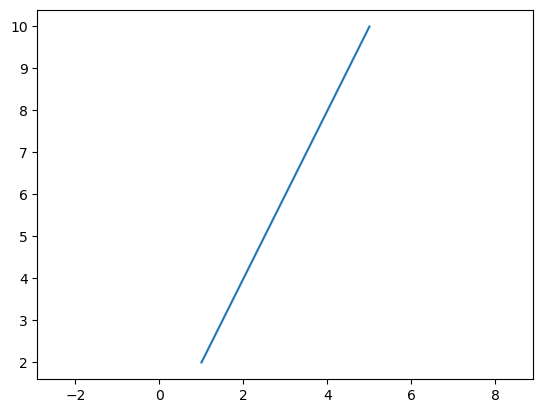

In [7]:
import matplotlib.pyplot as plt

x =[1, 2, 3, 4, 5]
y =[2, 4, 6, 8, 10]

plt.plot(x, y)

# we can turn off the axis and display
# only the line by passing the
# optional parameter 'off' to it
plt.axis('equal')

plt.show()
